In [1]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import psycopg2
import datetime
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database, drop_database
import matplotlib.pyplot as plt

In [2]:
sns.set_style('whitegrid')

In [3]:
with open('pg_credentials.p', 'rb') as f:
    pg_credentials = pickle.load(f)

In [4]:
host     = 'localhost'
db_name  = 'goodreads_db'
username = pg_credentials['username']
password = pg_credentials['password']
port = '5432'  # default port that postgres listens on
    
con = psycopg2.connect(database = db_name, user = username, host=host, password=password)

In [5]:
query = "SELECT true_score, nratings, pub_date FROM works WHERE nratings>0"
numerical_data = pd.read_sql_query(query, con)

In [6]:
numerical_data = numerical_data[~numerical_data['pub_date'].isna()]
numerical_data['pub_date'] = pd.to_datetime(numerical_data['pub_date'], errors='coerce').dt.date

In [7]:
x = numerical_data['pub_date'] - datetime.date(1954,1,1)
y = np.log10(numerical_data['nratings'])

In [46]:
x = x.dt.days
x = x.fillna(0)
mask = (x>=0) & (x<x.max())

In [47]:
maxday = x[mask].max()
x = x.values/x[mask].max()

In [49]:
numerical_data = numerical_data[mask]

Text(0, 0.5, 'log10(nratings)')

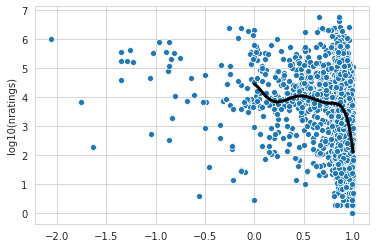

In [62]:
from numpy.polynomial import Polynomial
p = Polynomial.fit(x[mask], y[mask], 6)
sns.scatterplot(x, y)
xp, yp = p.linspace()
plt.plot(xp, yp, color='black', lw=3)
plt.ylabel("log10(nratings)")

In [66]:
np.save("maxday.npy", maxday)

In [67]:
np.save("daypolyfit.npy", [xp, yp])